In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [4]:
df_train=pd.read_csv('train.csv')

In [5]:
df_train.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
df_train.shape

(891, 12)

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#HOW many survived and didnt survive

df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

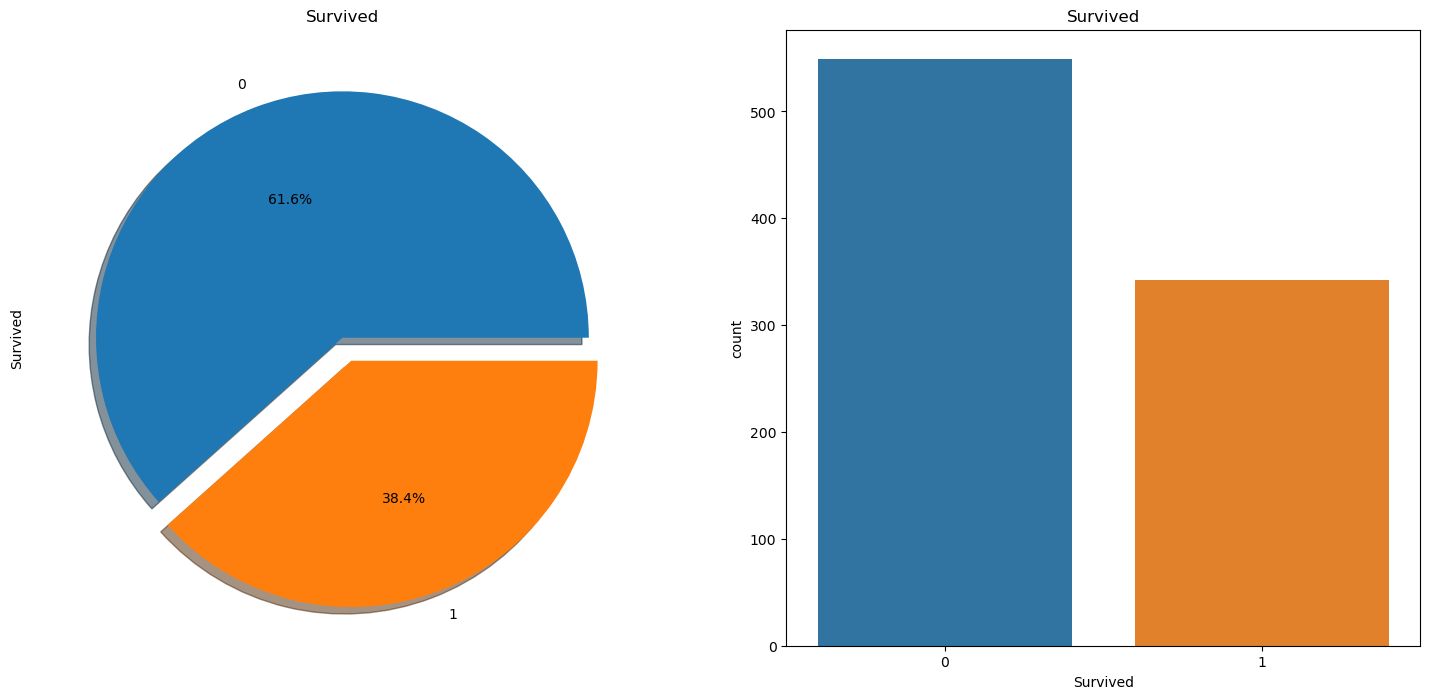

In [16]:
# plotting the info
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
sns.countplot(x=df_train['Survived'],ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [21]:
#Analysing The Features
df_train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

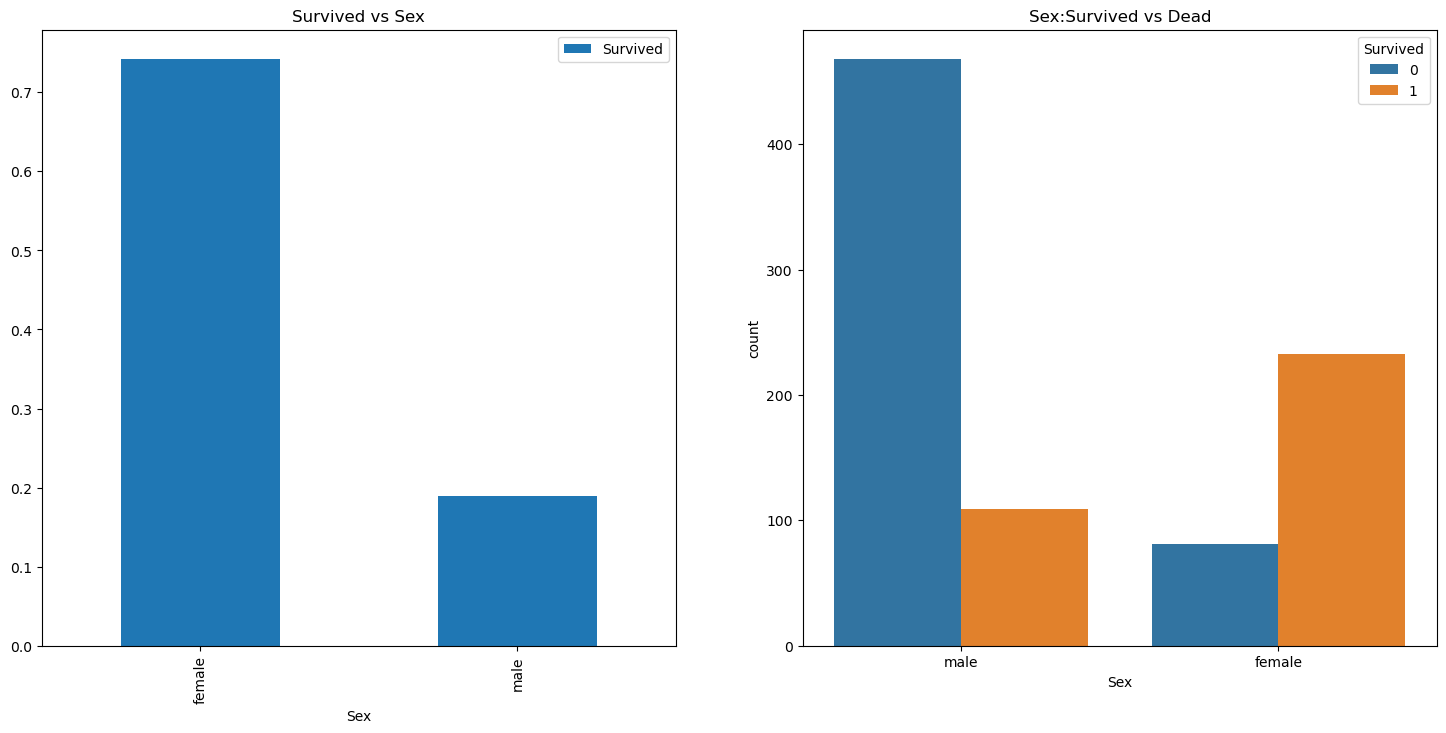

In [24]:
#Against Sex
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [ ]:
#Against Class
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [18]:
df_train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [20]:
df_train[df_train['Pclass']==1]['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [21]:
#assign
#df_train['age'].fillna()
#by assignment or inplace
#MR. Ms.
#corr between embark and survive and also Pclass
#for filling na Mean or max repeated value

In [22]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
df_train['Embarked'].fillna('S',inplace=True) #As S is max

In [47]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True) #Choosing mean value

In [48]:
df_train['Sex'].value_counts()

0    891
Name: Sex, dtype: int64

In [33]:
df_train['Sex']=df_train['Sex'].apply(lambda x: 1 if x == 'female' else 0) #assigned too

In [34]:
df_train.drop('Name',axis=1,inplace=True)

In [35]:
df_train.drop('Ticket',axis=1,inplace=True)

In [36]:
df_train['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [38]:
embarked_df=pd.get_dummies(df_train['Embarked'])

In [39]:
embarked_df.shape

(891, 3)

In [40]:
df_train=pd.concat([df_train,embarked_df],axis=1)

In [41]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,0,22.0,1,0,7.2500,NaN,S,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,C85,C,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,NaN,S,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,C123,S,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,NaN,S,0,0,1


In [42]:
df_train.drop('Embarked',axis=1,inplace=True)

In [43]:
df_train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q,S
0,1,0,3,0,22.0,1,0,7.2500,NaN,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,C85,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,NaN,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,C123,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,NaN,0,0,1


In [44]:
df_train.drop('Cabin',axis=1,inplace=True)

In [45]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


In [46]:
df_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,1.000000,-0.005007,-0.035144,NaN,0.033207,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,NaN,-0.069809,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,NaN,-0.331339,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,0.033207,-0.069809,-0.331339,NaN,1.000000,-0.232625,-0.179191,0.091566,0.032024,-0.013855,-0.019336
SibSp,-0.057527,-0.035322,0.083081,NaN,-0.232625,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,NaN,-0.179191,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,NaN,0.091566,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184
C,-0.001205,0.168240,-0.243292,NaN,0.032024,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742
Q,-0.033606,0.003650,0.221009,NaN,-0.013855,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421
